## Team 14 - Melbourne

##### Kranthi Kumar Kommuri 1049507
##### James Ng 1316315
##### Emmanuel Pinca 1080088
##### Matteo Rossi 1222468
##### Thanadol Ultarnpatumros 1323866

In [1]:
import couchdb
import random
import pandas as pd
import numpy as np
from scipy.special import softmax

In [2]:
user = "admin"
password = "admin"
couchserver = couchdb.Server("http://%s:%s@172.26.134.187:5984/" % (user, password))

In [3]:
db = couchserver['twitter']
rows = db.view('_design/CrimeInfo/_view/TweetData')

In [4]:
data = [(row['id'], row['value']) for row in rows]
#random.seed(0)
#random.shuffle(data)

In [5]:
numTweets = 10000

In [6]:
data = pd.DataFrame(data).rename({0: "id", 1: "tweet"}, axis='columns')[:numTweets]

In [7]:
dfSentiment = data.copy(deep=True)
dfSentiment

,id,tweet
0,1520266206548213760,When you’re stuck underneath a pup \n\n#Albus...
1,1520342297728241664,Just posted a photo @ Organ Pipes National Par...
2,493802764774825984,Finally home
3,493802997793570817,When Harry met Anna 😉😍💕 http://t.co/8cnpbUlnVz
4,493803077489537024,Home Weather - Temp: 12.4 °C. Wind: 8.9 km/h N...
...,...,...
9995,495508603722158080,@Flipltb and did u hold hands during dinner.
9996,495508858987880448,Kicking people off tables coz we huuungry (@ C...
9997,495509181151989761,Lol that's why crusaders are the best counter ...
9998,495509245341614080,@takumiiiii0412 これは友達の彼氏の愚痴を聞いてたの(｡･o･｡)😢 か、かす...


In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# remove hashtags
def hashtags(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/m.rossi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
# translate emoji
def emoji(text):
  for emot in UNICODE_EMOJI:
    if text == None:
      text = text
    else:
      text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
    return text

In [10]:
# remove retweet username and tweeted at @username
def remove_users(tweet):
  '''Takes a string and removes retweet and @user information'''
  tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) 
  # remove tweeted at
  return tweet

In [11]:
# remove links
def remove_links(tweet):
  '''Takes a string and removes web links from it'''
  tweet = re.sub(r'http\S+', '', tweet) # remove http links
  tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly links
  tweet = tweet.strip('[link]') # remove [links]
  return tweet
def clean_html(text):
  html = re.compile('<.*?>')#regex
  return html.sub(r'',text)

In [12]:
# remove non ascii character
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

In [13]:
# remove email address
def email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'',text)

def punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text 

In [14]:
# remove stopwords
def removeStopWords(str):
#select english stopwords
  cachedStopWords = set(stopwords.words("english"))
#add custom words
  cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))
#remove stop words
  new_str = ' '.join([word for word in str.split() if word not in cachedStopWords]) 
  return new_str

In [15]:
# special characters removal
def remove_(tweet):
  tweet = re.sub('([_]+)', "", tweet)
  return tweet

In [16]:
#apply all the functions above
#dfSentiment['hashtag'] = dfSentiment.tweet.apply(func = hashtags)
dfSentiment['new_tweet'] = dfSentiment.tweet.apply(func = emoji)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = remove_users)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = clean_html)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = remove_links)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = non_ascii)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = lower)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = email_address)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = removeStopWords)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = clean_html)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = punct)
dfSentiment['new_tweet'] = dfSentiment.new_tweet.apply(func = remove_)

In [17]:
dfSentiment

,id,tweet,new_tweet
0,1520266206548213760,When you’re stuck underneath a pup \n\n#Albus...,youre stuck underneath pup albus albiedog pupp...
1,1520342297728241664,Just posted a photo @ Organ Pipes National Par...,posted photo organ pipes national park
2,493802764774825984,Finally home,finally home
3,493802997793570817,When Harry met Anna 😉😍💕 http://t.co/8cnpbUlnVz,harry met anna
4,493803077489537024,Home Weather - Temp: 12.4 °C. Wind: 8.9 km/h N...,home weather temp 12 4 c wind 8 9 km h nne bar...
...,...,...,...
9995,495508603722158080,@Flipltb and did u hold hands during dinner.,u hold hands dinner
9996,495508858987880448,Kicking people off tables coz we huuungry (@ C...,kicking people tables coz huuungry cornish arm...
9997,495509181151989761,Lol that's why crusaders are the best counter ...,lol that s crusaders best counter attacking team
9998,495509245341614080,@takumiiiii0412 これは友達の彼氏の愚痴を聞いてたの(｡･o･｡)😢 か、かす...,o


In [18]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    scores = result[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    #for i in range(scores.shape[0]):
        #l = config.id2label[ranking[i]]
        #s = scores[ranking[i]]
        #print(f"{i+1}) {l} {np.round(float(s), 4)}")
    
    return (config.id2label[ranking[0]], scores[ranking[0]])

dfSentiment['sentiment'] = dfSentiment['new_tweet'].apply(lambda x: sentiment_score(x[:512]))

In [20]:
dfSentiment

,id,tweet,new_tweet,sentiment
0,1520266206548213760,When you’re stuck underneath a pup \n\n#Albus...,youre stuck underneath pup albus albiedog pupp...,"(Neutral, 0.82787895)"
1,1520342297728241664,Just posted a photo @ Organ Pipes National Par...,posted photo organ pipes national park,"(Neutral, 0.73221326)"
2,493802764774825984,Finally home,finally home,"(Positive, 0.86881274)"
3,493802997793570817,When Harry met Anna 😉😍💕 http://t.co/8cnpbUlnVz,harry met anna,"(Neutral, 0.8515799)"
4,493803077489537024,Home Weather - Temp: 12.4 °C. Wind: 8.9 km/h N...,home weather temp 12 4 c wind 8 9 km h nne bar...,"(Neutral, 0.85651684)"
...,...,...,...,...
214394,551063864087814145,"Mccrae St, Dandenong. #Other, going. Timeline:...",mccrae st dandenong other going timeline,"(Neutral, 0.94569063)"
214395,551066895634276354,“@samthaboss: @sireprince happy new year sire ...,happy new year sire mitchthanks bro,"(Positive, 0.9689846)"
214396,551067907669516289,"Wind 12.2 km/h ENE. Barometer 1004.6 hPa, Risi...",wind 12 2 km h ene barometer 1004 6 hpa rising...,"(Neutral, 0.84032524)"
214397,551071551815049216,The mosquito bites are real tonight,mosquito bites real tonight,"(Neutral, 0.5018282)"


In [22]:
dfSentiment.to_csv('tweets_classified.csv', index=True)

### Topic Modelling

In [18]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [19]:
# start with 10k tweets only
embeddings = model.encode(dfSentiment["new_tweet"], show_progress_bar=True)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [20]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [21]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

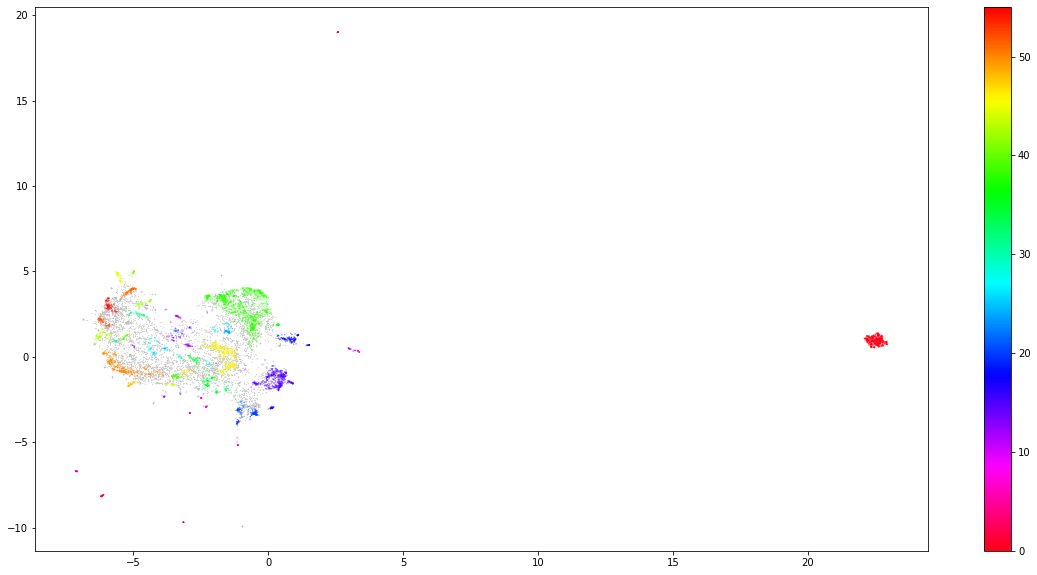

In [22]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [23]:
d = list(dfSentiment["new_tweet"])

In [24]:
docs_df = pd.DataFrame(d, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

In [26]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

/Users/m.rossi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic,Size
0,-1,4797
39,38,1089
1,0,625
16,15,461
47,46,377
51,50,301
36,35,154
19,18,134
52,51,125
46,45,108


In [36]:
top_n_words[45][:10]
#top_n_words[1][:10]

[('que', 0.21238425036634992),
 ('es', 0.10179538244753794),
 ('la', 0.09605874666622935),
 ('el', 0.08719169787673495),
 ('mi', 0.07125676771327656),
 ('se', 0.06458263432295748),
 ('te', 0.06327028648389584),
 ('mas', 0.06327028648389584),
 ('en', 0.05970364772527796),
 ('pero', 0.05657457230943601)]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(20):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

    # Calculate new topic words
    m = len(data)
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

In [ ]:
#top_n_words[-1][:10]